In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

ad2 = pd.read_csv(
    "iPSC_differentiation_mRNA_only_AD2-results-with-normalized.csv")
ad3 = pd.read_csv(
    "iPSC_differentiation_mRNA_only_AD3-results-with-normalized.csv")
eigthy = pd.read_csv(
    "iPSC_differentiation_mRNA_only_840-results-with-normalized.csv")
ad2_mir = pd.read_csv("AD2_miRNAs_timeline_ltr-results-with-normalized.csv")
ad3_mir = pd.read_csv("AD3_miRNAs_timeline_ltr-results-with-normalized.csv")
eigthy_mir = pd.read_csv("840_miRNAs_timeline_ltr-results-with-normalized.csv")
network_analysis = pd.read_csv(
    "consensusAnalysis-CombinedNetworkResults_filtered_power20.csv")
# get rid of the grey module
network_analysis = network_analysis[network_analysis["ModuleColor"] != "grey"]
networks = network_analysis.loc[:, [
    "Probe", "ModuleColor", "external_gene_name", "gene_biotype"
]]
network_analysis_mir = pd.read_csv(
    "mirna_consensusAnalysis-CombinedNetworkResults_filtered.csv")
networks_mir = network_analysis_mir.loc[:, ["Probe", "ModuleColor"]]
networks_mir.columns = ["Probe", "ModuleColor"]

In [35]:
ad2_normalized_mirna = pd.read_csv("AD2_miRNAs_timeline_ltr-vst-transformed-counts.csv")
ad3_normalized_mirna = pd.read_csv("AD3_miRNAs_timeline_ltr-vst-transformed-counts.csv")
eight_normalized_mirna = pd.read_csv("840_miRNAs_timeline_ltr-vst-transformed-counts.csv")

In [3]:
ad2_normalized_mrna = pd.read_csv("AD2_mRNAs_timeline_ltr-vst-transformed-counts.csv")
ad3_normalized_mrna = pd.read_csv("AD3_mRNAs_timeline_ltr-vst-transformed-counts.csv")
eight_normalized_mrna = pd.read_csv("840_mRNAs_timeline_ltr-vst-transformed-counts.csv")

In [4]:
ad2_normalized_mrna["Unnamed: 0"] = [i.split(".")[0] for i in ad2_normalized_mrna["Unnamed: 0"]]
ad3_normalized_mrna["Unnamed: 0"] = [i.split(".")[0] for i in ad3_normalized_mrna["Unnamed: 0"]]
eight_normalized_mrna["Unnamed: 0"] = [i.split(".")[0] for i in eight_normalized_mrna["Unnamed: 0"]]

In [5]:
# get rid of the gene id version
ad2["ensembl_gene_id_version"] = [i.split(".")[0] for i in ad2["ensembl_gene_id_version"]]
ad3["Row.names"] = [i.split(".")[0] for i in ad3["Row.names"]]
eigthy["Row.names"] = [i.split(".")[0] for i in eigthy["Row.names"]]

In [87]:
#set labelsize
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

In [6]:
#this should be executed if you want to get rid of the genes/mirna that show an expression of below 5 counts in more than three samples

mask = (ad2.iloc[:,8:].values > 5).sum(axis=1) >= 3
mask_ad3 = (ad3.iloc[:,8:].values > 5).sum(axis=1) >= 3
mask_eighty = (eigthy.iloc[:,8:].values > 5).sum(axis=1) >= 3
ad2_prefilter = ad2[mask]
ad3_prefilter = ad3[mask_ad3]
eighty_prefilter = eigthy[mask_eighty]
gesamt = set(ad2_prefilter["ensembl_gene_id_version"]) & set(ad3_prefilter["Row.names"]) & set(eighty_prefilter["Row.names"])
ad2_end = ad2_prefilter[ad2_prefilter["ensembl_gene_id_version"].isin(gesamt)]
ad3_end = ad3_prefilter[ad3_prefilter["Row.names"].isin(gesamt)]
eighty_end = eighty_prefilter[eighty_prefilter["Row.names"].isin(gesamt)]

# ad2_end.to_csv("iPSC_differentiation_mRNA_only_AD2-results-with-normalized_filtered.csv")
# ad3_end.to_csv("iPSC_differentiation_mRNA_only_AD3-results-with-normalized_filtered.csv")
# eighty_end.to_csv("iPSC_differentiation_mRNA_only_840-results-with-normalized_filtered.csv")

In [33]:
mask_mirna = (ad2_mir.iloc[:,8:].values > 5).sum(axis=1) >= 3
mask_ad3_mirna = (ad3_mir.iloc[:,8:].values > 5).sum(axis=1) >= 3
mask_eighty_mirna = (eigthy_mir.iloc[:,8:].values > 5).sum(axis=1) >= 3
ad2_prefilter_mir = ad2_mir[mask_mirna]
ad3_prefilter_mir = ad3_mir[mask_ad3_mirna]
eighty_prefilter_mir = eigthy_mir[mask_eighty_mirna]
gesamt_mirna = set(ad2_prefilter_mir["Row.names"]) & set(ad3_prefilter_mir["Row.names"]) & set(eighty_prefilter_mir["Row.names"])
ad2_end_mir = ad2_prefilter_mir[ad2_prefilter_mir["Row.names"].isin(gesamt_mirna)]
ad3_end_mir = ad3_prefilter_mir[ad3_prefilter_mir["Row.names"].isin(gesamt)]
eighty_end_mir = eighty_prefilter_mir[eighty_prefilter_mir["Row.names"].isin(gesamt_mirna)]

ad2_end_mir.to_csv()
ad3_end_mir.to_csv()
eighty_end_mir.to_csv()

,Unnamed: 0,Row.names,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,AD2_1.1,AD2_1.2,...,AD2_9.3,AD2_16.1,AD2_16.2,AD2_16.3,AD2_26.1,AD2_26.2,AD2_26.3,AD2_36.1,AD2_36.2,AD2_36.3
1,2,hsa-let-7a-3p,3.057932,-3.237424,0.884927,53.253940,2.982830e-10,6.998400e-10,10.761349,17.479852,...,0.000000,0.000000,1.814546,0.000000,0.000000,0.000000,0.000000,0.778888,0.843107,1.596201
2,3,hsa-let-7a-5p,79.370825,-3.378117,0.233279,628.407987,1.469578e-133,1.282444e-132,329.297279,278.429077,...,7.994097,24.949598,22.681831,20.732577,25.414522,34.454604,34.881391,81.004307,97.800469,87.791046
4,5,hsa-let-7b-5p,47.217142,-4.141779,0.314506,553.882263,1.854770e-117,1.433016e-116,180.790663,174.798524,...,3.197639,5.292339,7.258186,4.442695,19.889626,29.153895,23.254261,63.868780,53.115772,65.444234
5,6,hsa-let-7c-3p,6.472870,-1.181692,0.973814,106.394926,2.366043e-21,7.121614e-21,0.000000,0.000000,...,0.000000,6.048387,4.536366,2.221347,15.469709,9.717965,15.987304,23.366627,16.019042,23.144912
6,7,hsa-let-7c-5p,2266.129470,-2.319800,0.234435,3057.638834,0.000000e+00,0.000000e+00,142.049807,109.873358,...,56.758090,841.481904,899.107777,737.487370,4088.423131,4209.645802,5611.543770,7145.514521,7381.406084,9232.425618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646,2647,hsa-miR-9985,188.547713,1.420400,0.226910,582.394779,1.286651e-123,1.054532e-122,43.045396,26.219779,...,151.887847,156.502025,177.825554,176.967351,234.255596,250.900191,276.144345,443.187024,409.750241,414.214116
2648,2649,hsa-miR-99a-3p,5.590925,-1.527693,0.969039,53.093848,3.217385e-10,7.534148e-10,0.000000,0.000000,...,14.389375,9.828630,8.165459,9.625839,3.314938,7.951062,4.360174,8.567763,8.431075,3.192402
2649,2650,hsa-miR-99a-5p,18678.293571,0.130969,0.179959,1760.954059,0.000000e+00,0.000000e+00,398.169913,332.117195,...,17248.064185,36207.915441,34690.499437,30352.492227,29848.803794,29342.953970,34083.479138,31710.849431,24684.501123,34272.028086
2650,2651,hsa-miR-99b-3p,4277.057329,-0.243071,0.135553,370.153512,8.000053e-78,4.513518e-77,2701.098599,2709.377118,...,1315.828404,4586.945835,5109.762863,5146.862155,7762.479053,7057.009584,7531.473664,6196.829467,6937.088436,5698.436974


In [37]:
def merge_genes(df1, df2, label, mirna=None):
    print(df1, df2)
    if mirna:
        merged_df = pd.merge(df1,
                             df2,
                             how="left",
                             left_on="Row.names",
                             right_on="Unnamed: 0").drop(
                                 ["Unnamed: 0_x", "Unnamed: 0_y"],
                                 axis=1).iloc[:, np.r_[0:7, 25:42]]
    else:
        merged_df = pd.merge(df1,
                             df2,
                             how="left",
                             left_on=label,
                             right_on="Unnamed: 0").iloc[:, np.r_[1:8, 27:45]]
    return merged_df


#ad2_mir_trial = merge_genes(ad2_mir, ad2_normalized_mirna, "", mirna = True)
#ad3_mir_trial = merge_genes(ad3_mir, ad3_normalized_mirna,"", mirna = True)
#eight_mir_trial = merge_genes(eigthy_mir, eight_normalized_mirna,"", mirna = True)

ad2_trial = merge_genes(ad2_end, ad2_normalized_mrna,
                        "ensembl_gene_id_version")
ad3_trial = merge_genes(ad3_end, ad3_normalized_mrna, "Row.names")
eight_trial = merge_genes(eighty_end, eight_normalized_mrna, "Row.names")

ad2_trial_mirna = merge_genes(ad2_mir, ad2_normalized_mirna, "Row.names")
ad3_trial_mirna = merge_genes(ad3_mir, ad3_normalized_mirna, "Row.names")
eight_trial_mirna = merge_genes(eigthy_mir, eight_normalized_mirna,
                                "Row.names")

ad2_trial.to_csv(
    "iPSC_differentiation_mRNA_only_AD2-results-with-normalized_filtered.csv")
ad3_trial.to_csv(
    "iPSC_differentiation_mRNA_only_AD3-results-with-normalized_filtered.csv")
eight_trial.to_csv(
    "iPSC_differentiation_mRNA_only_840-results-with-normalized_filtered.csv")

       Unnamed: 0 ensembl_gene_id_version     baseMean  log2FoldChange  \
0               1         ENSG00000000003  1666.928296       -0.042198   
2               3         ENSG00000000419   555.307553       -1.104890   
3               4         ENSG00000000457   230.389557        0.066240   
4               5         ENSG00000000460   349.722024       -2.318593   
5               6         ENSG00000000938     2.211979       -5.832550   
...           ...                     ...          ...             ...   
66928       66929         ENSG00000288438     8.052458       -0.276175   
66932       66933         ENSG00000288442     5.146510        0.022272   
66947       66948         ENSG00000288457     7.336933       -2.104674   
66963       66964         ENSG00000288475    20.180628       -0.641517   
67003       67004         ENSG00000288518     7.434368        0.536470   

          lfcSE        stat         pvalue           padj      AD2_1.1  \
0      0.086876  279.212851   2.93818

      Unnamed: 0        Row.names      baseMean  log2FoldChange     lfcSE  \
0              1  hsa-let-7a-2-3p      1.051502       -0.670461  0.890822   
1              2    hsa-let-7a-3p      5.278040       -3.183611  0.795066   
2              3    hsa-let-7a-5p     83.501180       -3.120289  0.344635   
3              4    hsa-let-7b-3p      0.503579       -0.221466  0.792666   
4              5    hsa-let-7b-5p    137.050145       -2.918238  0.334609   
...          ...              ...           ...             ...       ...   
2647        2648     hsa-miR-9986      0.000000             NaN       NaN   
2648        2649   hsa-miR-99a-3p      7.590599       -1.418216  0.874763   
2649        2650   hsa-miR-99a-5p  21652.536339       -0.333446  0.215134   
2650        2651   hsa-miR-99b-3p   4147.132787       -0.088028  0.197200   
2651        2652   hsa-miR-99b-5p  42744.832943        0.205951  0.214441   

             stat         pvalue           padj       840_1.1       840_1.2

In [87]:
ad2_trial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20887 entries, 0 to 20886
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ensembl_gene_id_version  20887 non-null  object 
 1   baseMean                 20887 non-null  float64
 2   log2FoldChange           20887 non-null  float64
 3   lfcSE                    20887 non-null  float64
 4   stat                     20887 non-null  float64
 5   pvalue                   20884 non-null  float64
 6   padj                     20884 non-null  float64
 7   840_1.1                  20887 non-null  float64
 8   840_1.2                  20887 non-null  float64
 9   840_1.3                  20887 non-null  float64
 10  840_5.1                  20887 non-null  float64
 11  840_5.2                  20887 non-null  float64
 12  840_5.3                  20887 non-null  float64
 13  840_9.1                  20887 non-null  float64
 14  840_9.2               

In [46]:
#mirna_expression = pd.concat([ad2_mir,ad3_mir,eigthy_mir])
#mirna_expression
ad2_exp_mir = pd.DataFrame(ad2_trial_mirna.set_index("Row.names").iloc[:,1])
ad3_exp_mir = pd.DataFrame(ad3_trial_mirna.set_index("Row.names").iloc[:,1])
eigth_exp_mir = pd.DataFrame(eight_trial_mirna.set_index("Row.names").iloc[:,1])


In [52]:
#preprocess the datatables
def get_network(df1, df2, df3, networks, label, label2, label3, mrna=None):
    zelllines = ["AD2", "AD3", "840"]
    if mrna != None:
        timeline = 3 * ["0"] + 3 * ["5"] + 3 * ["9"] + 3 * ["16"] + 3 * [
            "26"
        ] + 3 * ["36"] + ["cluster"] + ["biotype"]
    else:
        timeline = 3 * ["0"] + 3 * ["5"] + 3 * ["9"] + 3 * ["16"] + 3 * [
            "26"
        ] + 3 * ["36"] + ["cluster"]
    ad2 = pd.merge(df1, networks, how="inner", left_on=label,
                   right_on="Probe").set_index(label2).iloc[:, label3:].drop(
                       "Probe", axis=1)
    ad3 = pd.merge(df2,
                   networks,
                   how="inner",
                   left_on="Row.names",
                   right_on="Probe").set_index(label2).iloc[:, label3:].drop(
                       "Probe", axis=1)
    eighty = pd.merge(
        df3, networks, how="inner", left_on="Row.names",
        right_on="Probe").set_index(label2).iloc[:, label3:].drop("Probe",
                                                                  axis=1)
    ad2.columns = timeline
    ad3.columns = timeline
    eighty.columns = timeline
    ad2["zelline"] = ad2.shape[0] * [zelllines[0]]
    ad3["zelline"] = ad3.shape[0] * [zelllines[1]]
    eighty["zelline"] = eighty.shape[0] * [zelllines[2]]
    gesamt = pd.concat([ad2, ad3, eighty])
    gesamt = gesamt.loc[gesamt["cluster"] != "grey"]
    if mrna:
        gesamt.to_csv("network_analysis_all_genes_mRNA.csv")
    else:
        gesamt.to_csv("network_analyis_all_miRNAs.csv")
    return gesamt


data_processed = get_network(ad2_trial, ad3_trial, eight_trial, networks,
                             "ensembl_gene_id_version", "external_gene_name",
                             7, True)
data_processed_mirna = get_network(ad2_trial_mirna, ad3_trial_mirna,
                                   eight_trial_mirna, networks_mir,
                                   "Row.names", "Row.names", 6)

In [88]:
data_processed

,0,0,0,5,5,5,9,9,9,16,...,16,26,26,26,36,36,36,cluster,biotype,zelline
external_gene_name,,,,,,,,,,,,,,,,,,,,,
TSPAN6,10.173025,10.321128,10.201848,11.352861,11.402222,11.447088,10.723668,10.956500,10.826044,9.784151,...,9.990957,10.214218,10.206124,10.736203,10.255511,10.207285,10.224154,magenta,protein_coding,AD2
DPM1,9.488057,9.663501,9.525281,9.454646,9.242737,9.190970,8.966051,9.279332,9.111753,8.777095,...,8.950164,8.708643,8.726191,8.867976,8.514601,8.596864,8.493223,blue,protein_coding,AD2
SCYL3,7.585081,7.367859,7.251649,8.013845,8.034727,8.099071,8.080532,8.085386,7.848785,8.124475,...,8.000314,7.942401,7.855277,7.838102,7.499927,7.657877,7.780869,darkred,protein_coding,AD2
C1orf112,8.916800,9.022645,8.718434,8.560829,8.549144,8.551667,8.333830,8.520255,8.326726,8.313105,...,8.368972,7.008880,6.751261,6.826471,6.101660,6.190359,6.117914,green,protein_coding,AD2
FGR,4.166329,4.188796,4.520195,0.908201,1.983013,1.949364,1.833753,1.863347,3.125693,1.725589,...,0.908201,0.908201,2.799522,0.908201,1.902955,2.690965,1.994095,brown,protein_coding,AD2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC118281.1,7.814702,7.385027,7.907616,8.375890,7.265306,7.164915,7.588837,7.488006,7.615658,7.361483,...,7.366535,8.117697,8.781232,8.136493,7.571245,8.160942,8.236038,turquoise,protein_coding,840
AL109627.1,6.107289,5.669154,6.001648,6.419853,6.525922,6.250340,6.315480,6.020577,6.004260,6.222643,...,6.447352,6.993960,6.640416,6.516866,7.086307,6.869253,7.380254,yellow,lncRNA,840
LJII02000414.1,4.312756,4.489282,4.622192,2.344983,2.393033,3.368227,2.080894,1.032625,1.032625,2.377188,...,2.350482,2.909866,2.888826,3.033345,3.521267,3.575091,2.998275,brown,pseudogene,840


In [60]:
# z-score the timelined expression values
from scipy import stats


def z_score_dataset(network_df):
    stats_z = network_df.iloc[:, :-3].values.astype(float)
    stats_z = stats.zscore(stats_z, axis=1)
    stats_end = pd.DataFrame(stats_z, index=network_df.index)
    stats_end["cluster"] = network_df["cluster"].tolist()
    stats_end["zelline"] = network_df["zelline"].tolist()
    return stats_end


def z_score_dataset_mirna(network_df):
    stats_z = network_df.iloc[:, :-2].values.astype(float)
    stats_z = stats.zscore(stats_z, axis=1)
    stats_end = pd.DataFrame(stats_z, index=network_df.index)
    stats_end["cluster"] = network_df["cluster"].tolist()
    stats_end["zelline"] = network_df["zelline"].tolist()
    return stats_end


z_df = z_score_dataset(data_processed)
z_df_mir = z_score_dataset_mirna(data_processed_mirna)

In [90]:
z_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,cluster,zelline
external_gene_name,,,,,,,,,,,,,,,,,,,,
TSPAN6,-0.698904,-0.396179,-0.639989,1.712709,1.813604,1.905310,0.426624,0.902538,0.635882,-1.493773,-0.549485,-1.071056,-0.614704,-0.631249,0.452245,-0.530302,-0.628876,-0.594395,magenta,AD2
DPM1,1.305049,1.805023,1.411130,1.209837,0.605948,0.458426,-0.182538,0.710236,0.232677,-0.721019,-0.129078,-0.227814,-0.916088,-0.866081,-0.462030,-1.469062,-1.234633,-1.529983,blue,AD2
SCYL3,-0.985412,-1.827982,-2.278744,0.677694,0.758694,1.008273,0.936362,0.955190,0.037454,1.106811,0.771974,0.625209,0.400573,0.062633,-0.003986,-1.315713,-0.703049,-0.225982,darkred,AD2
C1orf112,1.048923,1.154266,0.851497,0.694638,0.683008,0.685519,0.468714,0.654256,0.461644,0.448087,0.487788,0.503689,-0.849962,-1.106361,-1.031506,-1.752885,-1.664606,-1.736708,green,AD2
FGR,1.740311,1.760577,2.059510,-1.198636,-0.229117,-0.259470,-0.363755,-0.337060,0.801621,-0.461323,-0.313185,-1.198636,-1.198636,0.507403,-1.198636,-0.301332,0.409480,-0.219120,brown,AD2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC118281.1,0.105881,-0.885282,0.320213,1.400416,-1.161452,-1.393031,-0.415139,-0.647733,-0.353269,-0.939594,-0.618193,-0.927939,0.804822,2.335449,0.848182,-0.455720,0.904578,1.077809,turquoise,840
AL109627.1,-0.765365,-1.799915,-1.014811,-0.027319,0.223138,-0.427584,-0.273770,-0.970114,-1.008643,-0.492983,-0.324414,0.037613,1.328298,0.493489,0.201755,1.546354,1.033831,2.240438,yellow,840
LJII02000414.1,1.413855,1.578620,1.702675,-0.422813,-0.377964,0.532257,-0.669306,-1.647733,-1.647733,-0.392754,-1.647733,-0.417680,0.104435,0.084796,0.219686,0.675100,0.725338,0.186953,brown,840


In [72]:
def mean_value(df):
    network_mean = pd.DataFrame()
    network_mean["0"] = df.iloc[:, :2].mean(axis=1)
    network_mean["5"] = df.iloc[:, 2:5].mean(axis=1)
    network_mean["9"] = df.iloc[:, 5:8].mean(axis=1)
    network_mean["16"] = df.iloc[:, 8:11].mean(axis=1)
    network_mean["26"] = df.iloc[:, 11:14].mean(axis=1)
    network_mean["36"] = df.iloc[:, 14:17].mean(axis=1)
    network_mean["0_sem"] = df.iloc[:, :2].sem(axis=1)
    network_mean["5_sem"] = df.iloc[:, 2:5].sem(axis=1)
    network_mean["9_sem"] = df.iloc[:, 5:8].sem(axis=1)
    network_mean["16_sem"] = df.iloc[:, 8:11].sem(axis=1)
    network_mean["26_sem"] = df.iloc[:, 11:14].sem(axis=1)
    network_mean["36_sem"] = df.iloc[:, 14:17].sem(axis=1)
    network_mean["cluster"] = df["cluster"].tolist()
    network_mean["hierachical_cluster"] = df["hierachical_cluster"].tolist()
    return network_mean

In [ ]:
meaned_df = mean_value(z_df)
meaned_df_mir = mean_value(z_df_mir)

In [78]:
def mean_curve(zs_df):
    ad2 = zs_df.loc[zs_df["zelline"] == "AD2"]
    ad3 = zs_df.loc[zs_df["zelline"] == "AD3"]
    eighty = zs_df.loc[zs_df["zelline"] == "840"]
    columns = ["0", "5", "10", "16", "26", "36"]
    for i in set(zs_df["cluster"].tolist()):
        pr_ad2 = ad2.loc[ad2["cluster"] == i]
        pr_ad3 = ad3.loc[ad3["cluster"] == i]
        pr_eighty = eighty.loc[eighty["cluster"] == i]
        ad2_mean = pd.DataFrame()
        ad3_mean = pd.DataFrame()
        eighty_mean = pd.DataFrame()
        ad2_mean["mean"] = pr_ad2.iloc[:, :6].mean()
        ad3_mean["mean"] = pr_ad3.iloc[:, :6].mean()
        eighty_mean["mean"] = pr_eighty.iloc[:, :6].mean()
        ad2_mean["sem"] = pr_ad2.iloc[:, :6].sem()
        ad3_mean["sem"] = pr_ad3.iloc[:, :6].sem()
        eighty_mean["sem"] = pr_eighty.iloc[:, :6].sem()
        fig, ax = plt.subplots()
        sns.despine()
        ax.plot(eighty_mean.iloc[:, :1], color="blue")
        plt.fill_between(eighty_mean.index,
                         eighty_mean["mean"] - eighty_mean["sem"],
                         eighty_mean["mean"] + eighty_mean["sem"],
                         alpha=0.5,
                         color="blue")
        ax.plot(ad2_mean.iloc[:, :1], color="red")
        plt.fill_between(ad2_mean.index,
                         ad2_mean["mean"] - ad2_mean["sem"],
                         ad2_mean["mean"] + ad2_mean["sem"],
                         alpha=0.5,
                         color="red")
        ax.plot(ad3_mean.iloc[:, :1], color="green")
        plt.fill_between(ad3_mean.index,
                         ad3_mean["mean"] - ad3_mean["sem"],
                         ad3_mean["mean"] + ad3_mean["sem"],
                         alpha=0.5,
                         color="green")
        plt.title(str(i))
        plt.savefig(str(i) + "_mirna_cluster_ad2_ad3_840_curve.svg",
                    quality=90,
                    transparent=True,
                    dpi=600,
                    bbox_inches="tight")
    return ad2


#         ad2_mean.index = columns
#         ad3_mean.index = columns
#         eighty_mean.index = columns
#         print(ad2_mean)

In [ ]:
go_profiling = mean_curve(meaned_df)
go_profiling_end = go_profiling.reset_index()
go_profiling_end = go_profiling_end.dropna().set_index("external_gene_name")

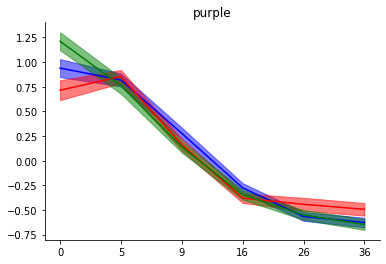

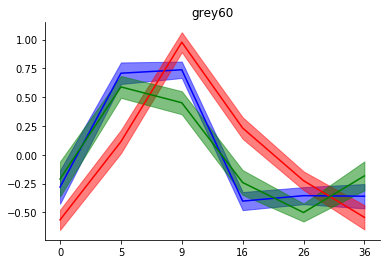

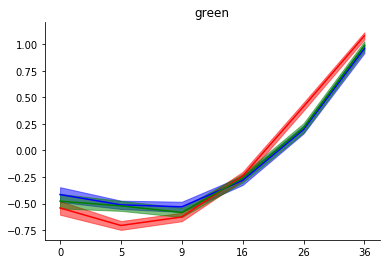

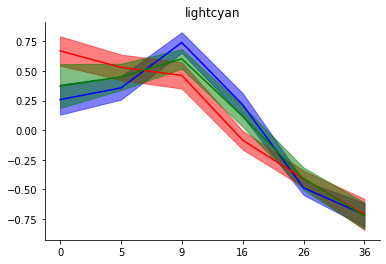

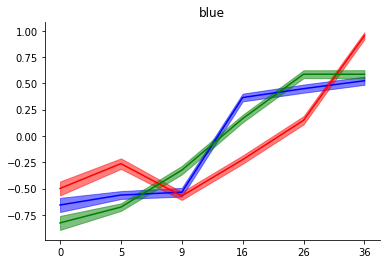

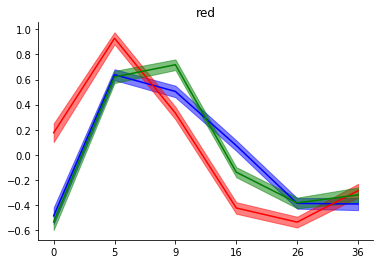

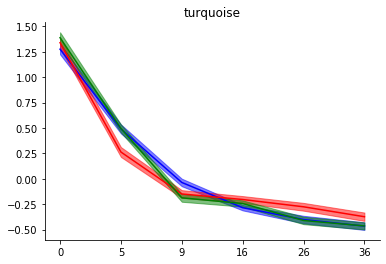

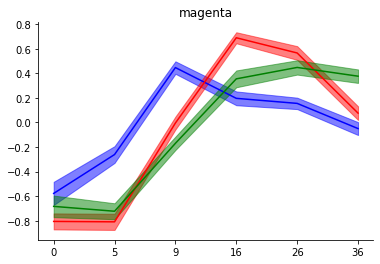

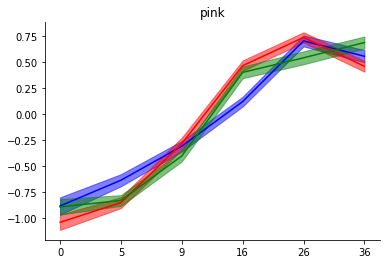

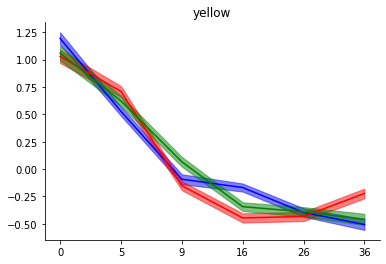

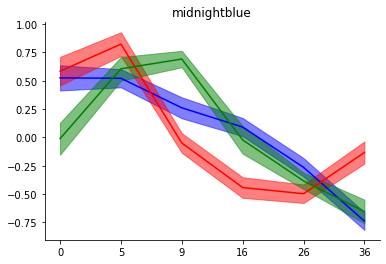

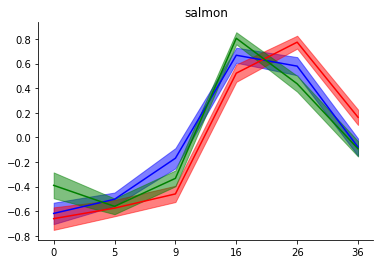

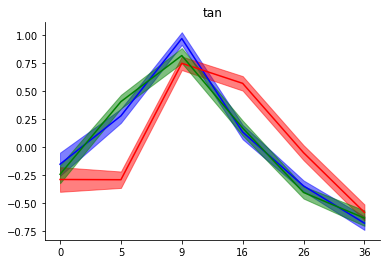

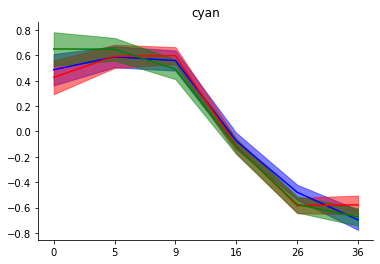

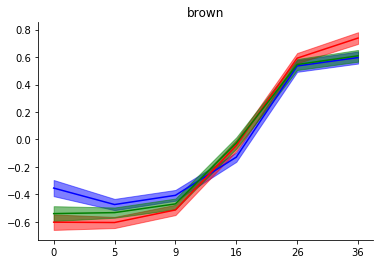

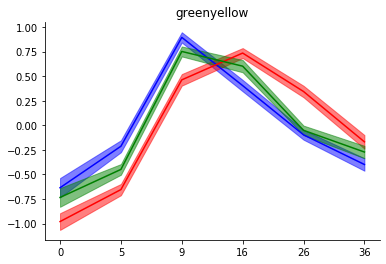

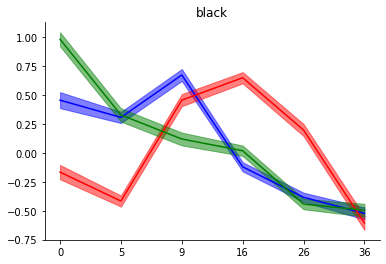

In [79]:
mirna_curves = mean_curve(meaned_df_mir)

In [108]:
# get the enriched genes pathways
import requests


def mirna_analysis_go_div(diana_df, species, cluster=None):
    # diana_dictionary == output von diana_only mirnas bzw. eigener DataFrame,
    # col_name is der Name der Column, die die Gene beinhaltet
    # sources = sind die sources die man gerne erhalten möchte als Liste bspw. ["GO"] wären alle Termen
    # ["GO:BP"] wäre einzig und allein Biological Process
    # KEGG ist ein optionaler parameter der angegeben kann wenn man auch an KEGG Pathways interessiert ist
    go_profiler = {}
    df_go_end = pd.DataFrame()
    if cluster != None:
        for i in sorted(set(diana_df[cluster].tolist())):
            diana_df_end = diana_df.loc[diana_df[cluster] == i]
            protein_list = diana_df_end.index.tolist()
            print(len(protein_list))

            r = requests.post(
                url='https://biit.cs.ut.ee/gprofiler/api/gost/profile/',
                json={
                    'organism': species,
                    'query': protein_list,
                    'sources': ["GO:BP", "GO:MF", "GO:CC", "KEGG"],
                },
                headers={'User-Agent': 'FullPythonRequest'})
            try:
                data = r.json()["result"]
                parents_list = []
                go_list = []
                p_value = []
                desc_value = []
                source_list = []
                for n in data:
                    go_list.append(n["native"])
                    for t in n["parents"]:
                        parents_list.append(t)
                end_list = [i for i in go_list if i not in parents_list]
                for m in data:
                    if m["native"] in end_list:
                        p_value.append(m["p_value"])
                for l in data:
                    if l["native"] in end_list:
                        desc_value.append(l["name"])
                for l in data:
                    if l["native"] in end_list:
                        source_list.append(l["source"])
                go_profiler.update({
                    "p-value": p_value,
                    "go-terms": end_list,
                    "description": desc_value,
                    "source": source_list
                })
                df_go = pd.DataFrame(
                    columns=["go-terms", "description", "source", "p-value"])
                df_go["go-terms"] = list(end_list)
                df_go["description"] = desc_value
                df_go["source"] = source_list
                df_go["p-value"] = p_value
                df_go["cluster"] = df_go.shape[0] * [str(i)]
                df_go_end = df_go_end.append(df_go)

            except KeyError as e:
                pass

    df_go_end.to_excel("signed_go_enrichment_analysis_filtered.xlsx")
    return (df_go_end)

In [109]:
mirna_analysis_go_div(go_profiling_end, "hsapiens", "cluster")

72
851
2249
2202
94
341
230
208
153
162
194
95
236
66
214
96
1122
420
283
102
288
108
268
108
250
478
112
321
197
113
169
511
127
53
432
1048
245
173
405
150
181
140
172
407
2440
163
188
1250
146


,go-terms,description,source,p-value,cluster
0,GO:0005802,trans-Golgi network,GO:CC,0.001077,bisque4
1,KEGG:04141,Protein processing in endoplasmic reticulum,KEGG,0.003237,bisque4
2,GO:0098588,bounding membrane of organelle,GO:CC,0.009090,bisque4
3,GO:0030136,clathrin-coated vesicle,GO:CC,0.048295,bisque4
0,GO:0016607,nuclear speck,GO:CC,0.004777,black
...,...,...,...,...,...
6,GO:0000245,spliceosomal complex assembly,GO:BP,0.014029,yellowgreen
7,GO:0003677,DNA binding,GO:MF,0.023832,yellowgreen
8,GO:1901363,heterocyclic compound binding,GO:MF,0.026218,yellowgreen
9,GO:0097159,organic cyclic compound binding,GO:MF,0.039164,yellowgreen


In [22]:
#aggregate cluster of the cluster
aggregated_z_df = z_df.reset_index()
aggregated_z_df = z_df.groupby(["cluster"], as_index=True).agg("mean")
aggregated_z_df.shape

(49, 18)

In [19]:
#make gene cluster
genes_cluster = z_df.groupby(["external_gene_name", "cluster"],
                             as_index=True).agg("mean")
genes_cluster = genes_cluster.reset_index()

6


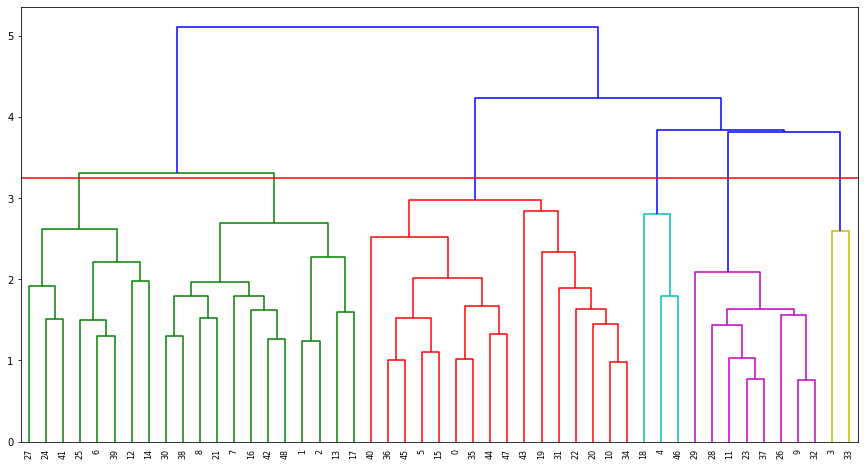

In [23]:
from scipy.spatial import distance
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import ward, fcluster
pfad = "/home/physiologie/Desktop/iPSC/mRNA/RawData/analysis/counts/Network_construction/"


def hierachical_clustering(df, threshold_cluster, label, label2, pfad):
    """
        defines the hierachical clustering of the data
        threshold_mRNA : threshold mRNA clustering after visualization
        threshold_miRNA : threhsold miRNA clustering after visualization
        """
    mRNA_correlation = np.asarray(df)
    #mRNA_correlation = stats.zscore(mRNA_correlation,axis = 1)

    # Define the hierachical linkage for rows and columns mRNA

    row_linkage_mRNA = hierarchy.linkage(distance.pdist(mRNA_correlation),
                                         method='average')

    col_linkage_mRNA = hierarchy.linkage(distance.pdist(mRNA_correlation),
                                         method='average')

    #get the cluster for miRNAs and mRNAs

    hierarchical_cluster_mRNA = fcluster(row_linkage_mRNA, threshold_cluster,
                                         "distance")

    #draw the dendograms

    fig, ax = plt.subplots(figsize=(15, 8))
    dn_mRNA = hierarchy.dendrogram(row_linkage_mRNA)
    plt.axhline(y=threshold_cluster, color='r', linestyle='-')
    plt.savefig(label2 + ".svg", quality=90, dpi=600, transparent=True)

    #extract clusters and assign to all the tables

    all_mrna = df

    all_mrna["hierachical_cluster"] = hierarchical_cluster_mRNA

    #determine the highest cluster number for further investigation

    max_clust_mRNA = all_mrna["hierachical_cluster"].max()
    print(max_clust_mRNA)

    #safe tables to previously specified path

    all_mrna.to_csv(label)
    return (all_mrna, hierarchical_cluster_mRNA)


trial = hierachical_clustering(aggregated_z_df, 3.25, "hallo", "hallo", pfad)

In [81]:
aggregated_z_df_cluster = aggregated_z_df.iloc[:, -1:]
aggregated_z_df_cluster = aggregated_z_df_cluster.reset_index()
gesamt = pd.merge(genes_cluster,
                  aggregated_z_df_cluster,
                  how="inner",
                  left_on="cluster",
                  right_on="cluster")
gesamt = gesamt.set_index(["external_gene_name", "cluster"])
print(gesamt)

                                   0         1         2         3         4  \
external_gene_name cluster                                                     
A1BG               bisque4 -1.009933 -0.926393 -0.900050 -0.778902 -0.638063   
ABHD2              bisque4 -0.792052 -0.788651 -0.791197 -1.252975 -0.995066   
AC003681.1         bisque4  0.621397  0.473684 -0.072030 -0.607909  0.841732   
AC067852.3         bisque4 -1.395012 -0.737278 -1.249986 -1.344368 -0.221268   
AC087163.2         bisque4 -0.494312 -0.663351 -0.380047 -0.292224 -0.513602   
...                              ...       ...       ...       ...       ...   
TRIM35             brown4   0.564172  0.384568  1.112505 -1.615006 -1.021456   
UNC13B             brown4   0.854482  0.638213  0.796213 -2.168336 -0.960272   
USH1G              brown4   0.838723  1.038528  0.816323 -1.182848 -1.109770   
WTAPP1             brown4   0.238935 -0.034644  0.654800 -0.101023  0.309611   
ZNF488             brown4   1.179074  1.

In [83]:
# try a different approach with k-means or another cluster algorithm
def svd_scatter(df):
    u, s, vh = np.linalg.svd(df.iloc[:, :-1].values)
    labels = ['SV' + str(i) for i in range(1, 3)]
    svd_df = pd.DataFrame(u[:, 0:2], columns=labels)
    svd_df["cluster"] = df["hierachical_cluster"].tolist()
    ax = plt.subplots(figsize=(12, 12))
    sns.despine()
    sns.scatterplot(data=svd_df,
                    x="SV1",
                    y="SV2",
                    hue="cluster",
                    legend="full",
                    palette="tab10",
                    linewidth=0,
                    s=10,
                    alpha=0.7)
    plt.xlabel("SVD1")
    plt.ylabel("SVD2")
    plt.title("iPSC-derived Nociceptor Differentiation Clock")
    plt.savefig(
        "miRNA_power16_ipsc_derived_nociceptor_differentiation_clock.svg",
        quality=90,
        transparent=True,
        dpi=600,
        bbox_inches="tight")


#svd_scatter(gesamt)

In [26]:
def mean_value(df):
    network_mean = pd.DataFrame()
    network_mean["0"] = df.iloc[:, :2].mean(axis=1)
    network_mean["5"] = df.iloc[:, 2:5].mean(axis=1)
    network_mean["9"] = df.iloc[:, 5:8].mean(axis=1)
    network_mean["16"] = df.iloc[:, 8:11].mean(axis=1)
    network_mean["26"] = df.iloc[:, 11:14].mean(axis=1)
    network_mean["36"] = df.iloc[:, 14:17].mean(axis=1)
    network_mean["0_sem"] = df.iloc[:, :2].sem(axis=1)
    network_mean["5_sem"] = df.iloc[:, 2:5].sem(axis=1)
    network_mean["9_sem"] = df.iloc[:, 5:8].sem(axis=1)
    network_mean["16_sem"] = df.iloc[:, 8:11].sem(axis=1)
    network_mean["26_sem"] = df.iloc[:, 11:14].sem(axis=1)
    network_mean["36_sem"] = df.iloc[:, 14:17].sem(axis=1)
    network_mean["cluster"] = df["clustering"].tolist()
    network_mean["hierachical_cluster"] = df["hierachical_cluster"].tolist()
    return network_mean

<class 'pandas.core.frame.DataFrame'>
Index: 20023 entries, A1BG to ZNF488
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cluster              20023 non-null  object 
 1   0                    20023 non-null  float64
 2   1                    20023 non-null  float64
 3   2                    20023 non-null  float64
 4   3                    20023 non-null  float64
 5   4                    20023 non-null  float64
 6   5                    20023 non-null  float64
 7   6                    20023 non-null  float64
 8   7                    20023 non-null  float64
 9   8                    20023 non-null  float64
 10  9                    20023 non-null  float64
 11  10                   20023 non-null  float64
 12  11                   20023 non-null  float64
 13  12                   20023 non-null  float64
 14  13                   20023 non-null  float64
 15  14                   20023 non-null  

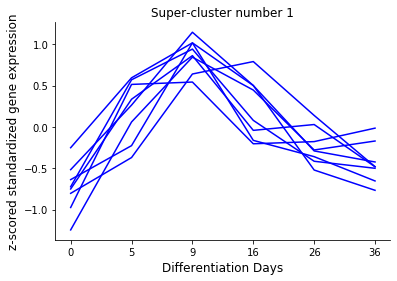

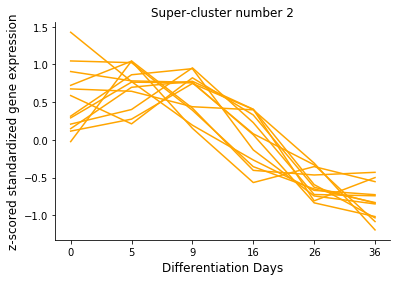

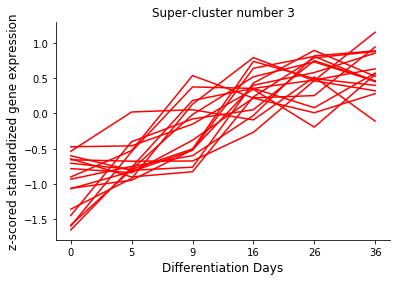

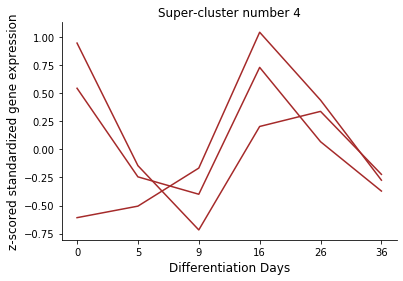

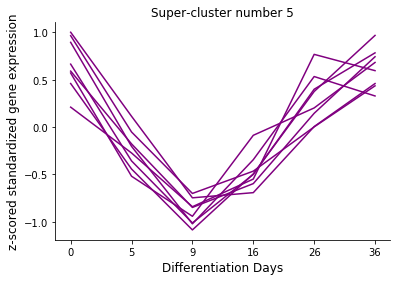

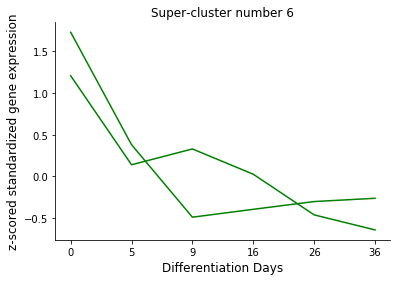

In [27]:
gesamt_line = gesamt.reset_index().set_index("external_gene_name")
gesamt_line.info()
gesamt_line.columns = [
    "cluster", "0", "0", "0", "5", "5", "5", "9", "9", "9", "16", "16", "16",
    "26", "26", "26", "36", "36", "36", "hierachical_cluster"
]
gesamt_line["clustering"] = gesamt_line["cluster"]
gesamt_line = gesamt_line.drop("cluster", axis=1)
svd_mean = mean_value(gesamt_line)
hallo = svd_mean.groupby(["cluster"]).agg("mean")
color = ["blue", "orange", "red", "brown", "purple", "green", "skyblue"]
for i, t in zip(set(gesamt_line["hierachical_cluster"].tolist()), color):
    clustered = hallo[hallo["hierachical_cluster"] == i]
    fig, ax = plt.subplots()
    sns.despine()
    plotting = clustered.iloc[:, 0:6].T
    ax.plot(plotting, c=t)
    plt.title("Super-cluster number %s" % (str(i)))
    plt.ylabel("z-scored standardized gene expression", fontsize=12)
    plt.xlabel("Differentiation Days", fontsize=12)
    plt.savefig("super_cluster_" + str(i) + ".svg",
                dpi=600,
                transparent=True,
                quality=90,
                bbox_inches="tight")

In [28]:
#save results to with hierachical clustering and module affiliation
gesamt = gesamt.reset_index().drop_duplicates("external_gene_name")
gesamt.to_csv("Supercluster_iPSC_network_mRNA_all_zelllines.csv")

In [61]:
# miRNA analysis according to gene expression analysis
aggregated_z_mir = z_df_mir.reset_index()
aggregated_z_mir = aggregated_z_mir.groupby(["cluster"],
                                            as_index=True).agg("mean")

mir_cluster = z_df_mir.groupby(["Row.names", "cluster"],
                               as_index=True).agg("mean")
mir_cluster = mir_cluster.reset_index()
mir_cluster

,Row.names,cluster,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,hsa-let-7a-2-3p,green,-0.711736,-0.711736,-0.711736,-0.711736,-0.711736,-0.711736,-0.711736,-0.711736,-0.711736,-0.711736,0.004884,-0.129368,0.689224,1.059053,0.888609,1.475432,1.527488,1.602043
1,hsa-let-7a-3p,turquoise,1.416244,1.170174,1.377321,-0.260400,0.046243,-0.976069,-0.976069,-0.976069,-0.976069,-0.254896,-0.544888,-0.751493,-0.606949,-0.032232,-0.520974,1.055045,0.773273,1.037811
2,hsa-let-7c-3p,brown,-0.672065,-1.022135,-1.022135,-1.022135,-1.022135,-0.765774,-0.546308,-1.022135,-1.022135,0.376021,0.167223,0.140834,1.257946,0.929124,1.045601,1.499181,1.371299,1.329727
3,hsa-let-7c-5p,green,-0.560707,-0.623310,-0.539775,-1.071559,-1.149861,-1.068681,-1.099902,-0.911701,-0.952806,0.109937,0.099396,0.098706,1.059015,0.991945,1.219460,1.432786,1.472913,1.494143
4,hsa-let-7d-3p,green,-0.512757,0.015488,-0.433397,-0.602403,-1.094916,-0.735234,-0.678704,-0.906022,-0.860724,-0.234374,-0.371493,-0.271278,0.263901,0.147158,0.273526,1.976836,1.935746,2.088648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,hsa-miR-9985,green,-1.523720,-1.734327,-1.550091,-0.777392,-0.739837,-0.681852,0.025638,0.011136,-0.090390,0.063818,0.277343,0.115885,0.721103,0.800785,0.642982,1.522731,1.500038,1.416151
1455,hsa-miR-99a-3p,magenta,-1.449182,-1.449182,-1.039622,-1.044159,-1.449182,-1.449182,0.949637,0.610512,0.732665,0.901544,0.784132,0.861770,0.674820,0.474954,0.506848,0.611247,0.448283,0.324098
1456,hsa-miR-99a-5p,pink,-1.387617,-1.401427,-1.279518,-1.416952,-1.466510,-1.370237,0.379006,0.304528,0.337033,0.867052,0.794427,0.779356,0.867244,0.845520,0.856696,0.812287,0.685098,0.794013
1457,hsa-miR-99b-3p,blue,-0.227814,-0.263632,0.064404,-0.487878,-0.692723,-0.628886,-1.753255,-1.480711,-1.492618,0.226206,0.368173,0.654995,0.910006,0.778824,1.042905,0.841354,1.190614,0.950037


5


array([3, 1, 1, 3, 1, 5, 4, 3, 2, 3, 1, 3, 4, 2, 5, 3, 3], dtype=int32)

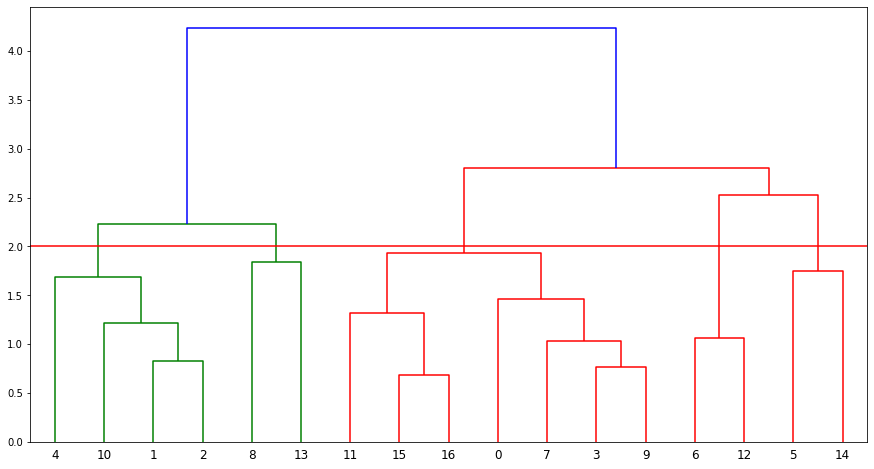

In [62]:
hierachical_clustering(aggregated_z_mir,2.0,"miRNA.csv","supercluster", pfad)[1]

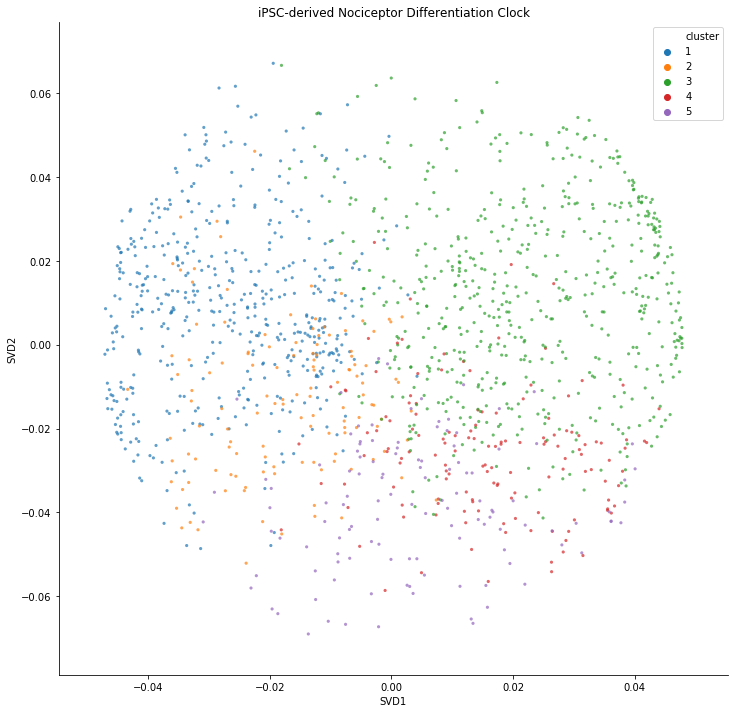

In [84]:
aggregated_z_mir_cluster = aggregated_z_mir.iloc[:, -1:]
aggregated_z_mir_cluster = aggregated_z_mir_cluster.reset_index()
mir_clustering = pd.merge(mir_cluster,
                          aggregated_z_mir_cluster,
                          how="inner",
                          left_on="cluster",
                          right_on="cluster")
mir_clustering = mir_clustering.set_index(["Row.names", "cluster"])
mir_clustering.to_csv("miR_superclustering.csv")
svd_scatter(mir_clustering)

                         0         0         0         5         5         5  \
Row.names                                                                      
hsa-let-7a-2-3p  -0.711736 -0.711736 -0.711736 -0.711736 -0.711736 -0.711736   
hsa-let-7c-5p    -0.560707 -0.623310 -0.539775 -1.071559 -1.149861 -1.068681   
hsa-let-7d-3p    -0.512757  0.015488 -0.433397 -0.602403 -1.094916 -0.735234   
hsa-let-7d-5p    -0.067375 -0.178586 -0.012618 -0.968527 -0.827864 -0.825976   
hsa-let-7e-3p    -0.580906 -0.438346 -1.200680 -1.110815 -0.897222 -1.371030   
...                    ...       ...       ...       ...       ...       ...   
hsa-miR-6751-3p   0.712670  0.575618  0.775071 -0.346161  0.346283  0.620796   
hsa-miR-7155-3p  -0.158999 -0.059437  0.052618  0.841930  0.268979  0.573822   
hsa-miR-7851-3p   0.678302  1.052303  0.533401  0.332010  0.389328  0.317742   
hsa-miR-92a-1-5p  1.067266  1.006404  1.001223  0.828628  0.914430  0.899660   
hsa-miR-92a-2-5p  0.967103  0.935977  1.

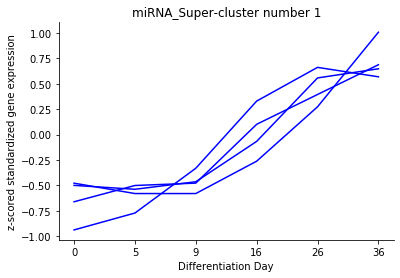

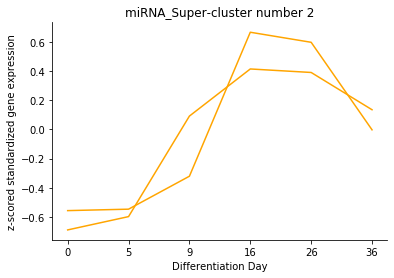

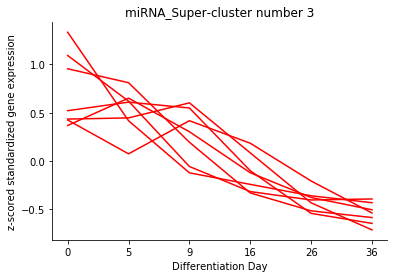

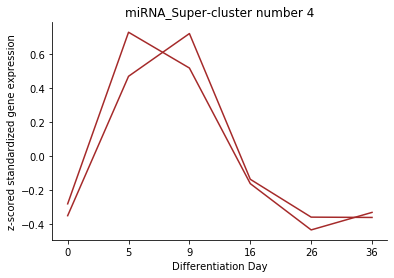

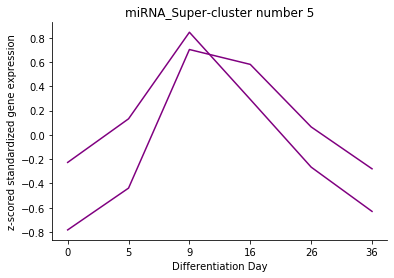

In [74]:
mir_line = mir_clustering.reset_index().set_index("Row.names")
mir_line["clustering"] = mir_line["cluster"]
mir_line = mir_line.drop(["cluster"], axis=1)
mir_line.columns = [
    "0", "0", "0", "5", "5", "5", "9", "9", "9", "16", "16", "16", "26", "26",
    "26", "36", "36", "36", "hierachical_cluster", "cluster"
]
mir_mean = mean_value(mir_line)
mir_draw = mir_mean.groupby(["cluster"]).agg("mean")
color = ["blue", "orange", "red", "brown", "purple"]
for i, t in zip(set(mir_line["hierachical_cluster"].tolist()), color):
    mir_clustered = mir_draw[mir_draw["hierachical_cluster"] == i]
    fig, ax = plt.subplots()
    sns.despine()
    plotting = mir_clustered.iloc[:, 0:6].T
    ax.plot(plotting, c=t)
    plt.title("miRNA_Super-cluster number %s" % (str(i)))
    plt.ylabel("z-scored standardized gene expression")
    plt.xlabel("Differentiation Day")
    plt.savefig("mirna_super_cluster_" + str(i) + ".svg",
                dpi=600,
                transparent=True,
                quality=90,
                bbox_inches="tight")